In [1]:
import base64
import json
import pandas as pd
import numpy as np
preprocesses = (
    'none',
    'ae_standardization',
    'ae_normalization',
    'standardization',
    'normalization'
)
layers = (
    [0],
    [20, 10, 5],
    [20, 15, 10],
    [20, 15, 10, 5]
)
models = ('lr', 'svm', 'rf', 'mp', 'lgb')
mdl_dict = {
    'lr': 'Logistic Regression',
    'svm': 'SVM',
    'rf': 'Random Forest',
    'mp': 'Multi Perceptron',
    'lgb': 'LightGBM'
}

datasets = ('kdd99', 'kdd99_dropped', 'creditcardfraud', 'ecoli', 'optical_digits', 'satimage', 'pen_digits', 'abalone', 'sick_euthyroid',
              'spectrometer', 'car_eval_34', 'isolet', 'us_crime', 'yeast_ml8', 'scene', 'libras_move', 'thyroid_sick', 'coil_2000',
              'arrhythmia', 'solar_flare_m0', 'oil', 'car_eval_4', 'wine_quality', 'letter_img', 'yeast_me2', 'webpage',
              'ozone_level', 'mammography', 'protein_homo', 'abalone_19')

used_classes = ('all', 'minority', 'majority')


def gen_hash(preprocess, layer, model, dataset, used_class, optuna) -> str:
    return base64.b64encode("".join([
        str(preprocess),
        str(layer),
        str(model),
        str(dataset),
        str(used_class),
        str(optuna)
    ]).encode()).decode()

In [2]:
def macro_f1(l: list):
    return np.mean([item['result']['macro']['f1'] for item in l])
def minority_f1(l: list):
    return np.mean([item['result']['minority']['f1'] for item in l])

In [3]:
with open("results/results.json") as f:
        data = json.load(f)
results = dict()
for result in data:
    results[result['hash']] = result

In [4]:
results_op_f = list()
for _h in results:
    if results[_h]['ae']['layers'] == [0] and results[_h]['ae']['used_class'] != 'all':
        continue
    if results[_h]['model']['optuna']:
        results_op_f.append(results[_h])
len(results_op_f)

959

In [5]:
results_op_f_ae_none = list()
results_op_f_ae = list()
for item in results_op_f:
    if item['ae']['layers'] == [0]:
        if not item['ae']["standardization"] and not item['ae']["normalization"]:
            results_op_f_ae_none.append(item)
    else:
        results_op_f_ae.append(item)
len(results_op_f_ae), len(results_op_f_ae_none)

(875, 40)

In [6]:
minority_f1_ae_none_avg = minority_f1(results_op_f_ae_none)
minority_f1_ae_avg = minority_f1(results_op_f_ae)

macro_f1_ae_none_avg = macro_f1(results_op_f_ae_none)
macro_f1_ae_avg = macro_f1(results_op_f_ae)
print(f"minority_f1_ae_none_avg: {minority_f1_ae_none_avg:.4f}")
print(f"minority_f1_ae_avg: {minority_f1_ae_avg:.4f}")
print(f"macro_f1_ae_none_avg: {macro_f1_ae_none_avg:.4f}")
print(f"macro_f1_ae_avg: {macro_f1_ae_avg:.4f}")

minority_f1_ae_none_avg: 0.5756
minority_f1_ae_avg: 0.5199
macro_f1_ae_none_avg: 0.8133
macro_f1_ae_avg: 0.7558


In [7]:
results_aeclass_all = list()
results_aeclass_minority = list()
results_aeclass_majority = list()
for item in results_op_f_ae:
    if item['ae']['used_class'] == 'all':
        results_aeclass_all.append(item)
    elif item['ae']['used_class'] == 'minority':
        results_aeclass_minority.append(item)
    elif item['ae']['used_class'] == 'majority':
        results_aeclass_majority.append(item)
len(results_aeclass_all), len(results_aeclass_minority), len(results_aeclass_majority)

(245, 21, 609)

In [8]:
macro_f1(results_aeclass_all), macro_f1(results_aeclass_majority), macro_f1(results_aeclass_minority)

(0.7555404081632654, 0.754404105090312, 0.798895238095238)

In [9]:
minority_f1(results_aeclass_all), minority_f1(results_aeclass_majority), minority_f1(results_aeclass_minority)

(0.5199057142857143, 0.5178307060755337, 0.5811285714285713)

In [10]:
results_0 = []
results_20_10_5 = []
results_20_15_10 = []
results_20_15_10_5 = []
for item in results_op_f:
    if item['ae']['layers'] == [0]:
        results_0.append(item)
    elif item['ae']['layers'] == [20, 10, 5]:
        results_20_10_5.append(item)
    elif item['ae']['layers'] == [20, 15, 10]:
        results_20_15_10.append(item)
    elif item['ae']['layers'] == [20, 15, 10, 5]:
        results_20_15_10_5.append(item)
len(results_0), len(results_20_10_5), len(results_20_15_10), len(results_20_15_10_5)

(84, 250, 181, 444)

In [11]:
minority_f1(results_0), minority_f1(results_20_10_5), minority_f1(results_20_15_10), minority_f1(results_20_15_10_5)

(0.5487476190476192, 0.5254052, 0.5299497237569061, 0.5127641891891892)

In [12]:
macro_f1(results_0), macro_f1(results_20_10_5), macro_f1(results_20_15_10), macro_f1(results_20_15_10_5)

(0.7823380952380953, 0.762338, 0.7592790055248617, 0.7506808558558559)

In [13]:
results_ae_none = []
results_ae_s = []
results_ae_n = []
results_ae_aes = []
results_ae_aen = []
for item in results_op_f_ae:
    if not item['dataset']['standardization'] and not item['dataset']['normalization']:
        results_ae_none.append(item)
    elif item['dataset']['standardization'] and not item['ae']['standardization']:
        results_ae_s.append(item)
    elif item['dataset']['normalization'] and not item['ae']['normalization']:
        results_ae_n.append(item)
    elif item['dataset']['standardization'] and item['ae']['standardization']:
        results_ae_aes.append(item)
    elif item['dataset']['normalization'] and item['ae']['normalization']:
        results_ae_aen.append(item)
len(results_ae_none), len(results_ae_s), len(results_ae_n), len(results_ae_aes), len(results_ae_aen)

(48, 297, 0, 530, 0)

In [14]:
print(f"minority_f1_none_avg: {minority_f1(results_ae_none):.4f}")
print(f"minority_f1_s_avg: {minority_f1(results_ae_s):.4f}")
print(f"minority_f1_aes_avg: {minority_f1(results_ae_aes):.4f}")
print(f"minority_f1_n_avg: {minority_f1(results_ae_n):.4f}")
print(f"minority_f1_aen_avg: {minority_f1(results_ae_aen):.4f}")

minority_f1_none_avg: 0.5559
minority_f1_s_avg: 0.5083
minority_f1_aes_avg: 0.5232
minority_f1_n_avg: nan
minority_f1_aen_avg: nan


/Users/rsato/ml/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rsato/ml/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [15]:
print(f"macro_f1_none_avg: {macro_f1(results_ae_none):.4f}")
print(f"macro_f1_s_avg: {macro_f1(results_ae_s):.4f}")
print(f"macro_f1_aes_avg: {macro_f1(results_ae_aes):.4f}")
print(f"macro_f1_n_avg: {macro_f1(results_ae_n):.4f}")
print(f"macro_f1_aen_avg: {macro_f1(results_ae_aen):.4f}")

macro_f1_none_avg: 0.7643
macro_f1_s_avg: 0.7502
macro_f1_aes_avg: 0.7581
macro_f1_n_avg: nan
macro_f1_aen_avg: nan


In [16]:
results_none = []
results_s = []
results_n = []
for item in results_op_f_ae_none:
    if not item['dataset']['standardization'] and not item['dataset']['normalization']:
        results_none.append(item)
    elif item['dataset']['standardization']:
        results_s.append(item)
    elif item['dataset']['normalization']:
        results_n.append(item)
len(results_none), len(results_s), len(results_n)

(27, 13, 0)

In [17]:
len(results_op_f_ae_none)

40

In [18]:
print(f"minority_f1_none_avg: {minority_f1(results_none):.4f}")
print(f"minority_f1_s_avg: {minority_f1(results_s):.4f}")
print(f"minority_f1_n_avg: {minority_f1(results_n):.4f}")


minority_f1_none_avg: 0.5566
minority_f1_s_avg: 0.6151
minority_f1_n_avg: nan


In [19]:
print(f"macro_f1_none_avg: {macro_f1(results_none):.4f}")
print(f"macro_f1_s_avg: {macro_f1(results_s):.4f}")
print(f"macro_f1_n_avg: {macro_f1(results_n):.4f}")

macro_f1_none_avg: 0.7849
macro_f1_s_avg: 0.8724
macro_f1_n_avg: nan


In [20]:
lr_0 = [item['result']['macro']['f1'] for item in results_0 if item['model']['name'] == 'lr']
lr_20_10_5 = [item['result']['macro']['f1'] for item in results_20_10_5 if item['model']['name'] == 'lr']
lr_20_15_10 = [item['result']['macro']['f1'] for item in results_20_15_10 if item['model']['name'] == 'lr']
lr_20_15_10_5 = [item['result']['macro']['f1'] for item in results_20_15_10_5 if item['model']['name'] == 'lr']
np.mean(lr_0), np.mean(lr_20_10_5), np.mean(lr_20_15_10), np.mean(lr_20_15_10_5)

(0.7243972222222221,
 0.7601666666666668,
 0.7414132530120481,
 0.7444932584269663)

In [21]:
svm_0 = [item['result']['macro']['f1'] for item in results_0 if item['model']['name'] == 'svm']
svm_20_10_5 = [item['result']['macro']['f1'] for item in results_20_10_5 if item['model']['name'] == 'svm']
svm_20_15_10 = [item['result']['macro']['f1'] for item in results_20_15_10 if item['model']['name'] == 'svm']
svm_20_15_10_5 = [item['result']['macro']['f1'] for item in results_20_15_10_5 if item['model']['name'] == 'svm']
np.mean(svm_0), np.mean(svm_20_10_5), np.mean(svm_20_15_10), np.mean(svm_20_15_10_5)


(0.7962848484848485, nan, 0.7912052631578946, 0.7616693693693695)

In [22]:
rf_0 = [item['result']['macro']['f1'] for item in results_0 if item['model']['name'] == 'rf']
rf_20_10_5 = [item['result']['macro']['f1'] for item in results_20_10_5 if item['model']['name'] == 'rf']
rf_20_15_10 = [item['result']['macro']['f1'] for item in results_20_15_10 if item['model']['name'] == 'rf']
rf_20_15_10_5 = [item['result']['macro']['f1'] for item in results_20_15_10_5 if item['model']['name'] == 'rf']
np.mean(rf_0), np.mean(rf_20_10_5), np.mean(rf_20_15_10), np.mean(rf_20_15_10_5)

(0.9201666666666668, 0.7422085714285714, nan, 0.7031807228915662)

In [23]:
lgb_0 = [item['result']['macro']['f1'] for item in results_0 if item['model']['name'] == 'lgb']
lgb_20_10_5 = [item['result']['macro']['f1'] for item in results_20_10_5 if item['model']['name'] == 'lgb']
lgb_20_15_10 = [item['result']['macro']['f1'] for item in results_20_15_10 if item['model']['name'] == 'lgb']
lgb_20_15_10_5 = [item['result']['macro']['f1'] for item in results_20_15_10_5 if item['model']['name'] == 'lgb']
np.mean(lgb_0), np.mean(lgb_20_10_5), np.mean(lgb_20_15_10), np.mean(lgb_20_15_10_5)

(0.8873000000000001,
 0.7742662921348314,
 0.7683800000000001,
 0.7743374999999998)

In [24]:
mp_0 = [item['result']['macro']['f1'] for item in results_0 if item['model']['name'] == 'mp']
mp_20_10_5 = [item['result']['macro']['f1'] for item in results_20_10_5 if item['model']['name'] == 'mp']
mp_20_15_10 = [item['result']['macro']['f1'] for item in results_20_15_10 if item['model']['name'] == 'mp']
mp_20_15_10_5 = [item['result']['macro']['f1'] for item in results_20_15_10_5 if item['model']['name'] == 'mp']
np.mean(mp_0), np.mean(mp_20_10_5), np.mean(mp_20_15_10), np.mean(mp_20_15_10_5)

(0.8386333333333335,
 0.7590533333333334,
 0.7591666666666668,
 0.7670054794520549)

In [25]:
results_datasets = dict()
for dataset in results_op_f:
    if dataset['dataset']['name'] not in results_datasets:
        results_datasets[dataset['dataset']['name']] = list()
    results_datasets[dataset['dataset']['name']].append(dataset)
len(results_datasets)

30

In [26]:
best_macro = dict()
for item in results_op_f:
    if best_macro.get(item['dataset']['name']) is None or best_macro[item['dataset']['name']]['result']['macro']['f1'] < item['result']['macro']['f1']:
        best_macro[item['dataset']['name']] = item

In [28]:
for k in best_macro:
    if best_macro[k]['dataset']['standardization']:
        pp = "標準化"
        if best_macro[k]['ae']['standardization']:
            aepp = "標準化"
        else:
            aepp = "なし"
    elif best_macro[k]['dataset']['normalization']:
        pp = "正規化"
        if best_macro[k]['ae']['normalization']:
            aepp = "正規化"
        else:
            aepp = "なし"
    else:
        pp = "なし"
        aepp = "なし"
    print(f"{k} & {pp} & {aepp} & {best_macro[k]['ae']['layers']} & {mdl_dict[best_macro[k]['model']['name']]} & {best_macro[k]['result']['macro']['f1']:.4f}\\\\")
    # _mi_s = best_macro[k]['result']['minority']['support']
    # _ma_s = best_macro[k]['result']['majority']['support']
    # _all_s = best_macro[k]['dataset']['sample_num']
    # print(f"{k} feature: {best_macro[k]['dataset']['default_feature_num']} sample: {_all_s}, minority: {_mi_s}({100*_mi_s/_all_s:.4f}), majority: {_ma_s}({100*_ma_s/_all_s:.4f})")

libras_move & 標準化 & 標準化 & [20, 15, 10, 5] & Multi Perceptron & 0.9217\\
arrhythmia & 標準化 & 標準化 & [20, 15, 10, 5] & LightGBM & 0.7506\\
oil & 標準化 & 標準化 & [20, 15, 10, 5] & SVM & 0.7913\\
solar_flare_m0 & なし & なし & [0] & SVM & 0.6062\\
car_eval_4 & 標準化 & 標準化 & [20, 15, 10, 5] & SVM & 1.0000\\
yeast_ml8 & 標準化 & 標準化 & [20, 15, 10, 5] & Multi Perceptron & 0.5325\\
thyroid_sick & 標準化 & なし & [20, 10, 5] & LightGBM & 0.9377\\
yeast_me2 & 標準化 & 標準化 & [20, 15, 10, 5] & LightGBM & 0.6828\\
ozone_level & 標準化 & なし & [20, 10, 5] & Multi Perceptron & 0.6311\\
wine_quality & 標準化 & なし & [20, 10, 5] & Multi Perceptron & 0.6346\\
scene & 標準化 & なし & [20, 10, 5] & Multi Perceptron & 0.6004\\
coil_2000 & 標準化 & 標準化 & [20, 15, 10, 5] & Multi Perceptron & 0.5439\\
abalone_19 & 標準化 & なし & [20, 15, 10, 5] & Multi Perceptron & 0.5187\\
mammography & 標準化 & なし & [20, 10, 5] & LightGBM & 0.8485\\
letter_img & 標準化 & なし & [20, 15, 10, 5] & SVM & 0.9889\\
ecoli & 標準化 & 標準化 & [20, 15, 10, 5] & Multi Perceptron & 0.8262\

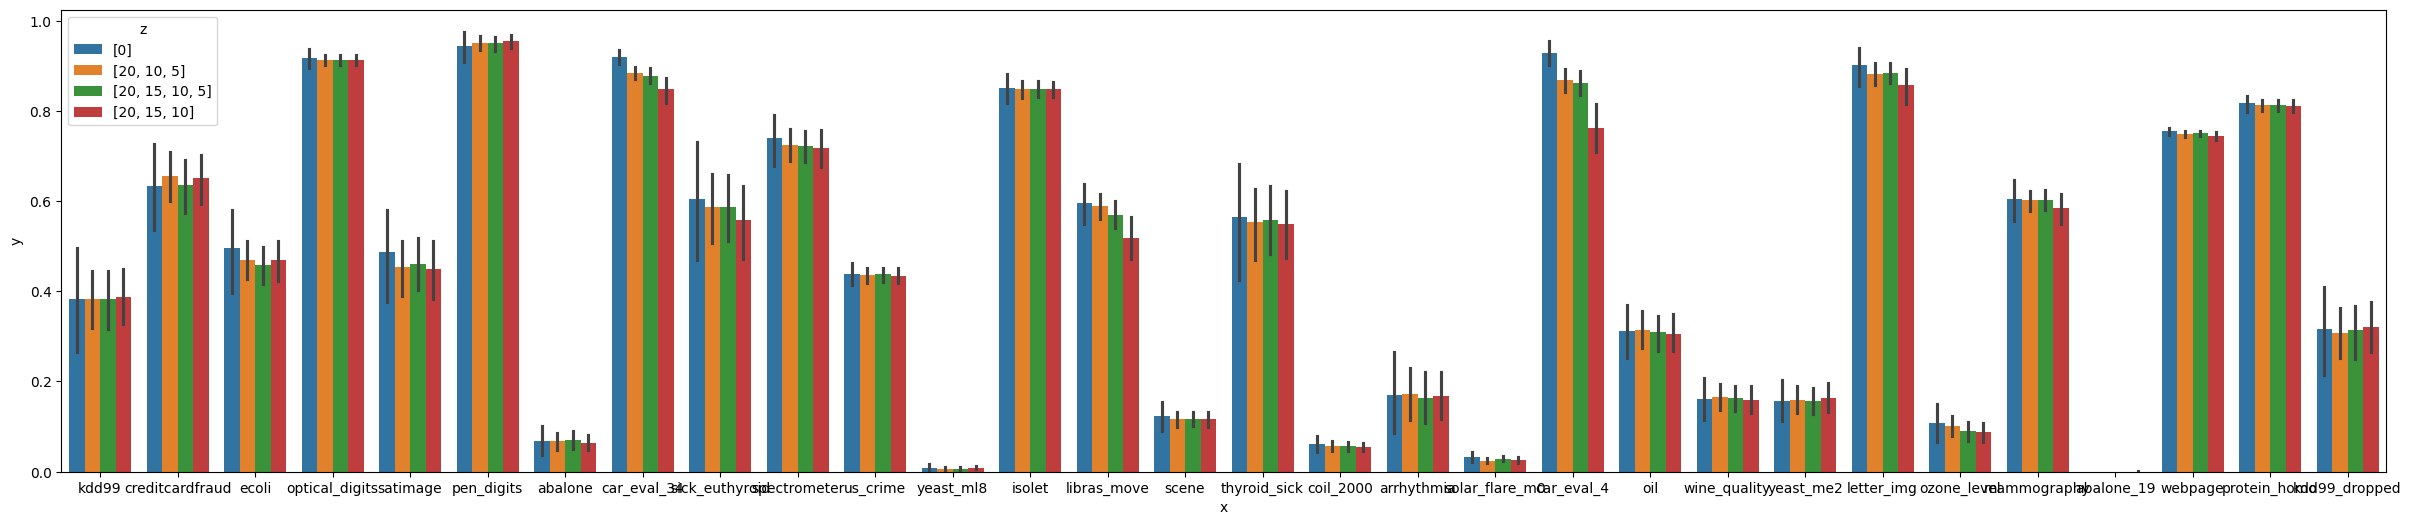

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# x軸：サンプル数　data['dataset']['sample_num']
# y軸：F1値　data['result']['macro']['f1']
# 描画の開始
data = dict()
for item in results_op_f:
    data[item['hash']] = dict(x=item['dataset']['name'], y=item['result']['minority']['f1'], z=str(item['ae']['layers']))
sns.barplot(x='x', y='y', hue='z',data=pd.DataFrame(data).T, dodge=True)
plt.show()


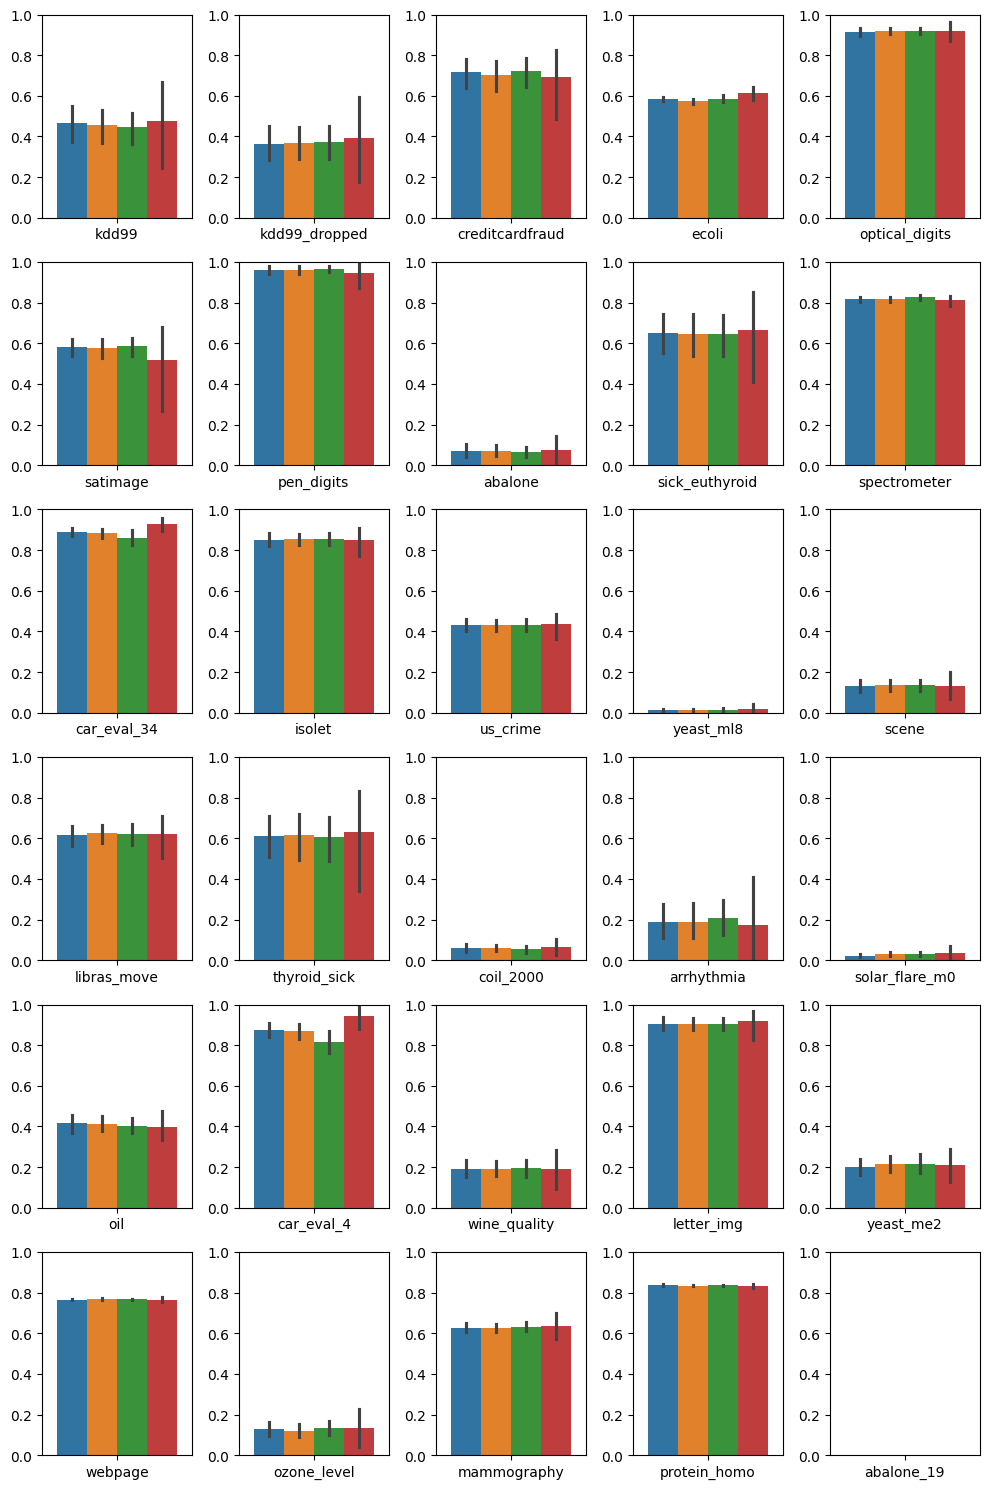

In [127]:
fig, axes = plt.subplots(6, 5, figsize=(10, 15))
axes = axes.ravel()

for i, dataset in enumerate(datasets):
    data = dict()
    for item in results_ae_aes:
        if item['dataset']['name'] == dataset:
            data[item['hash']] = dict(x=item['dataset']['name'], y=item['result']['minority']['f1'], z=str(item['ae']['layers']))
    for item in results_ae_s:
        if item['dataset']['name'] == dataset:
            data[item['hash']] = dict(x=item['dataset']['name'], y=item['result']['minority']['f1'], z=str(item['ae']['layers']))
    for item in results_s:
        if item['dataset']['name'] == dataset:
            data[item['hash']] = dict(x=item['dataset']['name'], y=item['result']['minority']['f1'], z=str(item['ae']['layers']))
    sns.barplot(x='x', y='y', hue='z',data=pd.DataFrame(data).T, dodge=True, ax=axes[i])
    axes[i].set_ylim(0, 1.0)
    # axes[i].set_title(dataset)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    # axes[i].set_xticklabels([])
    # axes[i].set_yticklabels([0, 0.2 ,0.4, 0.6, 0.8, 1.0])
    axes[i].legend_.remove()
plt.tight_layout()
plt.show()

In [69]:
results_0[0]

{'_id': '65a14811b329f447172e2fca',
 'hash': 'bm9uZVswXWxya2RkOTlhbGxGYWxzZQ==',
 'dataset': {'name': 'kdd99',
  'default_feature_num': 38,
  'ae_feature_num': 0,
  'total_feature_num': 38,
  'sample_num': 494021,
  'standardization': False,
  'normalization': False},
 'model': {'name': 'lr',
  'optuna': False,
  'params': {'C': 1.0,
   'class_weight': None,
   'dual': False,
   'fit_intercept': True,
   'intercept_scaling': 1,
   'l1_ratio': None,
   'max_iter': 100,
   'multi_class': 'auto',
   'n_jobs': None,
   'penalty': 'l2',
   'random_state': 2023,
   'solver': 'lbfgs',
   'tol': 0.0001,
   'verbose': 0,
   'warm_start': False},
  'best_params_list': []},
 'ae': {'layers': [0],
  'used_class': 'all',
  'epochs': 10,
  'activation': 'relu',
  'batch_size': 32,
  'standardization': False,
  'normalization': False},
 'env': {'version': '2.0.0',
  'datetime': '2024-01-12T23:09:21.138031',
  'elapsed_time': 115.298487},
 'result': {'majority': {'precision': 0.9511,
   'recall': 0.95

In [3]:
# results[gen_hash('none', [0], 'lr','kdd99', 'all', False)]

{'minority': 0.0, 'macro': 0.4017}

In [4]:
pp = preprocesses[0]
mdl = models[0]
aeclass = used_classes[0]
minority_df = pd.DataFrame({
    dataset: {
        str(layer): results[gen_hash(pp, layer, mdl, dataset, aeclass, False)]['minority']
        for layer in layers
    } for dataset in datasets
})
macro_df = pd.DataFrame({
    dataset: {
        str(layer): results[gen_hash(pp, layer, mdl, dataset, aeclass, False)]['macro']
        for layer in layers
    } for dataset in datasets
})

In [5]:
minority_df.T

,[0],"[20, 10, 5]","[20, 15, 10]","[20, 15, 10, 5]"
kdd99,0.0000,0.0000,0.0000,0.0000
kdd99_dropped,0.0000,0.0000,0.0000,0.0000
creditcardfraud,0.6807,0.6828,0.7014,0.6759
ecoli,0.0556,0.0556,0.0556,0.0556
optical_digits,0.8256,0.8355,0.8338,0.8415
satimage,0.0427,0.0516,0.0427,0.0512
pen_digits,0.7800,0.8067,0.7965,0.8251
abalone,0.0000,0.0000,0.0000,0.0000
sick_euthyroid,0.6900,0.7042,0.7179,0.6722
spectrometer,0.8335,0.8214,0.7885,0.7574


In [8]:
from visualization.result_table import ResultTable
t = ResultTable('lr', False, 'なし', 'なし', 'all',1)
t.aggregate_results()
with open(f"thesis/tables/{t.label}.tex", "w") as f:
    f.write(t.compile())
t.label

'lr|none|all|0'

In [128]:
11+4+6+115

136